In [1]:
import numpy as np
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
df = pd.read_csv('data2.csv')


In [11]:
df.set_index('SALESPERSON')

,Old Scheme (in thousands),New Scheme (in thousands)
SALESPERSON,,
1,57,62
2,103,122
3,59,54
4,75,82
5,84,84
6,73,86
7,35,32
8,110,104
9,44,38


In [22]:
df['Old Scheme (in thousands)']=df['Old Scheme (in thousands)']*1000
df['New Scheme (in thousands)']=df['New Scheme (in thousands)']*1000

In [23]:
oldmean=df['Old Scheme (in thousands)'].mean()
oldmean

68033.33333333333

In [24]:
newmean=df['New Scheme (in thousands)'].mean()
newmean

72033.33333333333

In [25]:
#Mean of amount before the introduction of new scheme = 68033
#Mean of amount after the introduction of new scheme = 72033
#Difference in mean = 72033 – 68033 = 4000

μ1 = Average sums by salesperson BEFORE the change. 
μ2 = Average sums by salesperson AFTER the change.

H0: μ1 = μ2  ; μ2 – μ1  = 0

Ha(alternate): μ1 < μ2   ; μ2 – μ1  > 0 ; difference of means is greater than zero.

Since population standard deviation is unknown, paired sample t-test will be used.     

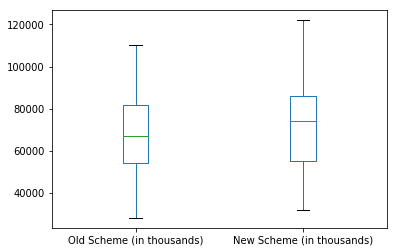

In [26]:
df[['Old Scheme (in thousands)', 'New Scheme (in thousands)']].plot(kind='box')

In [18]:
 from scipy import stats

In [34]:
stats.ttest_rel(df['Old Scheme (in thousands)'],df['New Scheme (in thousands)'])

Ttest_relResult(statistic=-1.5559143823544377, pvalue=0.13057553961337662)

In [35]:
#The new scheme has NOT significantly raised outputs.     Ans.2

In [ ]:
#since the pvalue is greater than 0.05 or 5% it shows that we failed to reject the null hypothesis. 
#and the new scheme hai no significant output on the result.    Ans.3

In [36]:
#Probability of Type I error = significant level = 0.05 or 5%   Ans(4.a)

Let  μ2 = Average sums assured by salesperson AFTER changeover.

μ1 = Average sums assured by salesperson BEFORE changeover.

μd = μ2 – μ1   H0: μd ≤ 5000  HA: μd > 5000

 Null Hypothesis will be rejected only if t_stats > t_crit
 t_critical = 1.69 for 0.05 significance and dof is (sample-1) i.e 30-1= 29

In [44]:
t_crit = stats.t.ppf(1-0.05, 29)
t_crit

1.6991270265334972

In [51]:
t_stat,p_val = stats.ttest_1samp(df['New Scheme (in thousands)']-df['Old Scheme (in thousands)'],5000)
t_stat , p_val

(-0.3889785955886094, 0.7001334912613286)

In [37]:
stats.ttest_rel(df['New Scheme (in thousands)'],df['Old Scheme (in thousands)'])

Ttest_relResult(statistic=1.5559143823544377, pvalue=0.13057553961337662)

In [52]:
l = ((oldmean- newmean) - 5000) / np.sqrt(((30-1)*np.var(df['Old Scheme (in thousands)']) + (30-1)*np.var(df['New Scheme (in thousands)'])) / 30+30-2)
l

-0.2947956482540291

In [56]:
print(ttest_power(l,alpha=0.05,nobs=30, alternative='smaller'))

0.47289550315754103
